In [9]:
import sys
sys.path.append('/home/albert/github/tensorflow/src/')
import evaluation
import data
sys.path.append('/home/albert/github/tensorflow/')
import densenet
import dense

In [2]:
from keras.models import Model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from scipy import misc

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test_dict, test_files = data.get_data('test')

In [4]:
model = evaluation.load_model('/home/albert/github/tensorflow/models/densenet_triplet/densenet_triplet.json', 
                              '/home/albert/github/tensorflow/models/densenet_triplet/densenet_triplet_13000.npy')

In [26]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_im (InputLayer)            (None, 256, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 128, 64, 64)   9408        input_im[0][0]                   
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 128, 64, 64)   256         conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128, 64, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [58]:
for l in range(len(model.layers)):
    if model.layers[l].name == 'average_pooling2d_2':
        print l

138


In [56]:
model.layers[-244]

In [59]:
cam_model = Model(inputs=model.input, outputs=model.layers[138].output)
cam_model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))

In [60]:
batch = data.output_batch_generator(test_dict, P=4, preprocess=False,
                                    shape=(256,128), keypoints=['Neck'], r=0.25).next()
n = 10
im = batch[0]['input_im'][n]
cam = cv2.resize(255 * batch[0]['input_cam'][n], (8,16)).astype(np.uint8)

im_proc = densenet.preprocess_input(im.copy())

preprocess False
keypoints ['Neck']


In [61]:
pred_overall = cam_model.predict(im_proc.reshape(1, im_proc.shape[0], im_proc.shape[1], 3))

In [62]:
cam_sum = np.sum(np.squeeze(pred_overall), axis=2)
cam_sum = (cam_sum - cam_sum.min()) * 255.0 / \
                    (cam_sum - cam_sum.min()).max()

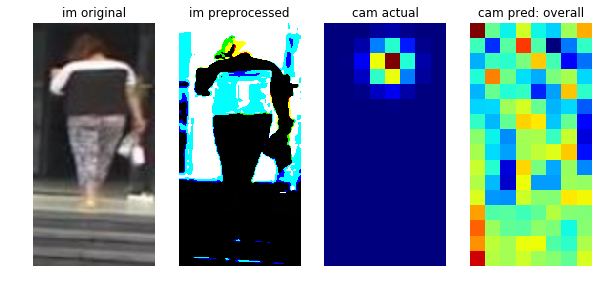

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(141)
plt.imshow(im.astype(np.uint8))
plt.axis('off')
plt.title('im original')

plt.subplot(142)
plt.imshow(im_proc.astype(np.uint8))
plt.axis('off')
plt.title('im preprocessed')

plt.subplot(143)
plt.imshow(cam, cmap=plt.cm.jet)
plt.axis('off')
plt.title('cam actual')

plt.subplot(144)
plt.imshow(cam_sum.astype(np.uint8), cmap=plt.cm.jet)
plt.axis('off')
plt.title('cam pred: overall')

plt.show()

In [64]:
pred_overall.shape

(1, 16, 8, 256)

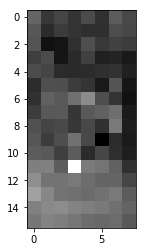

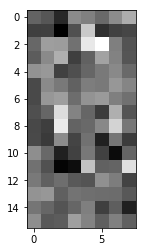

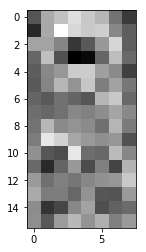

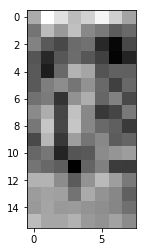

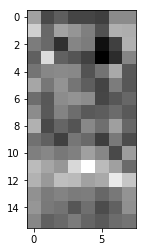

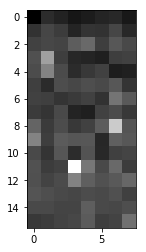

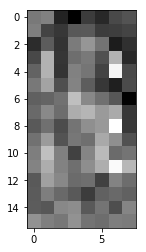

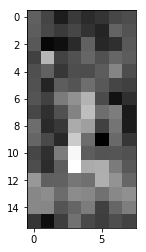

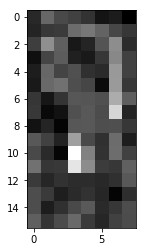

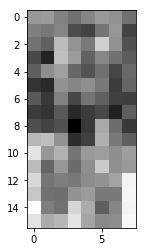

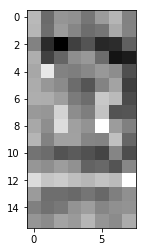

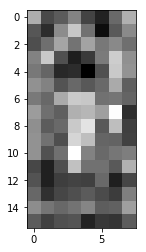

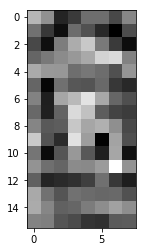

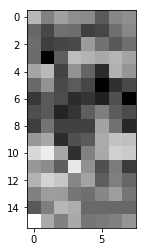

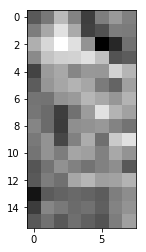

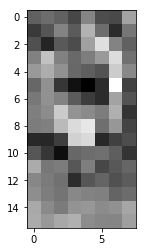

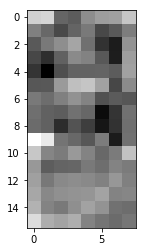

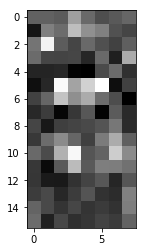

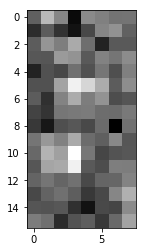

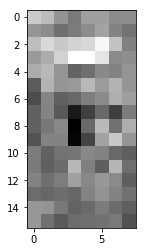

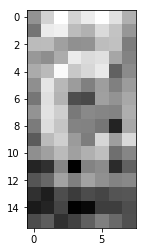

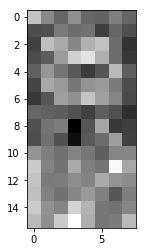

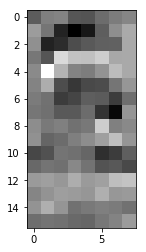

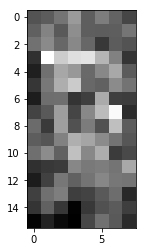

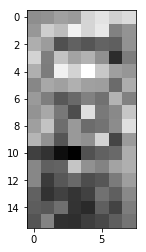

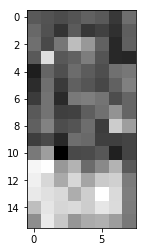

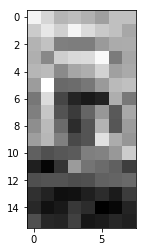

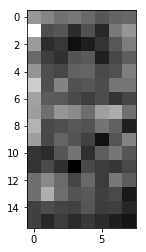

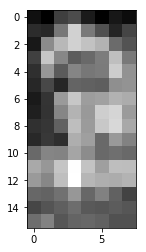

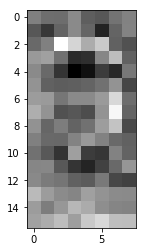

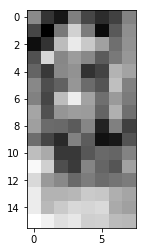

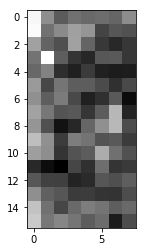

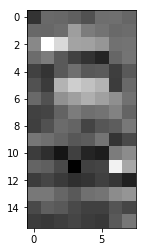

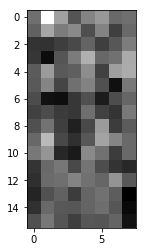

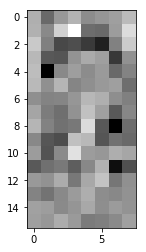

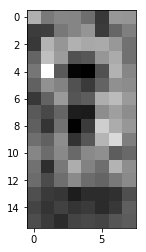

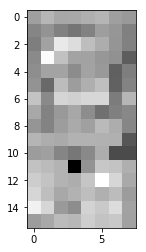

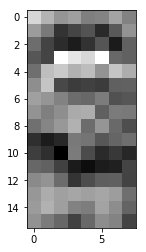

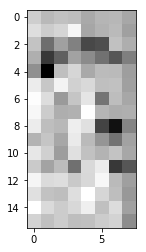

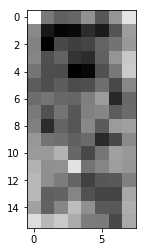

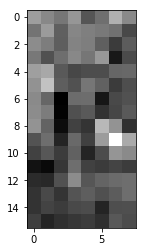

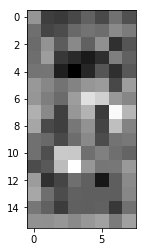

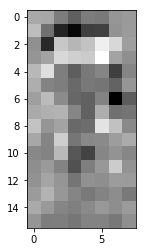

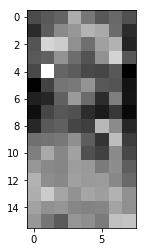

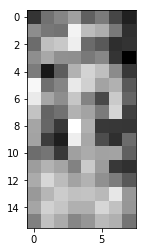

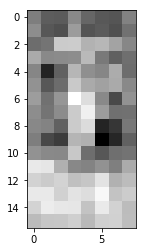

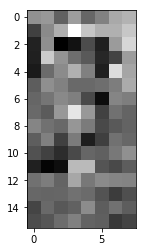

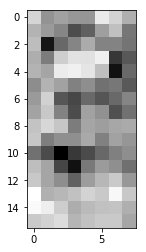

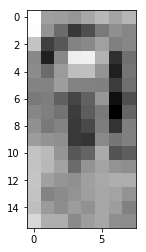

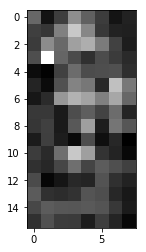

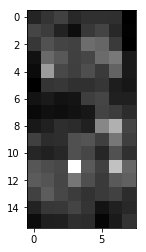

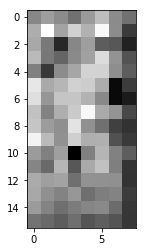

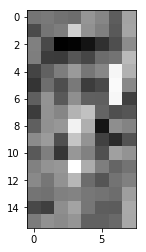

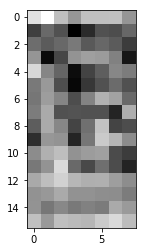

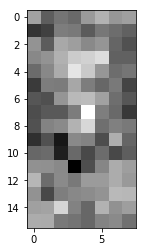

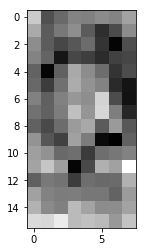

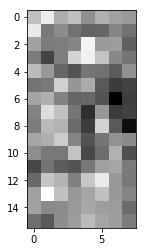

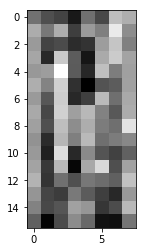

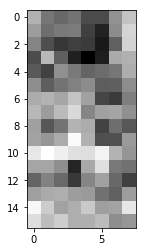

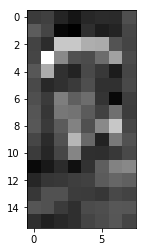

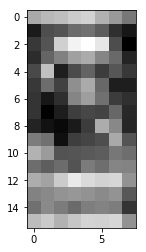

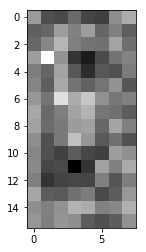

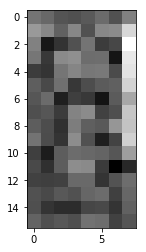

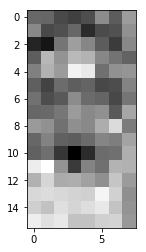

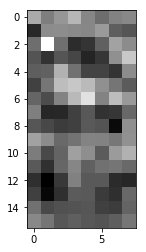

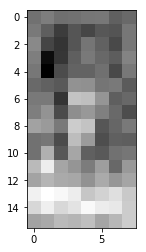

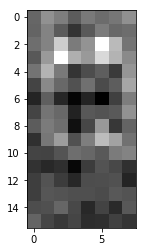

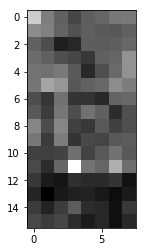

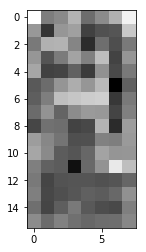

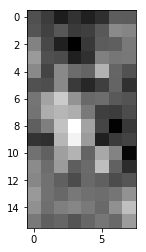

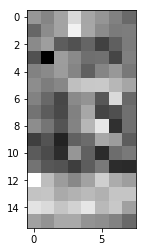

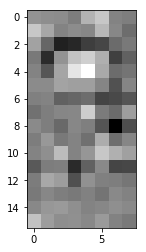

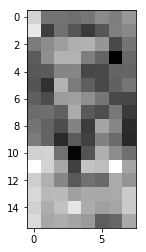

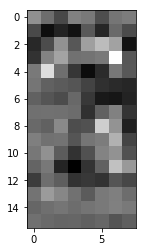

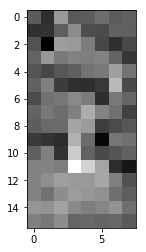

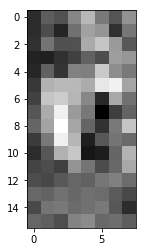

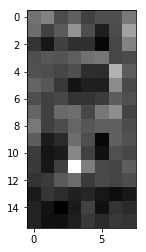

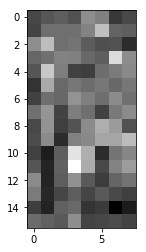

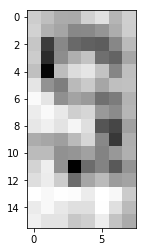

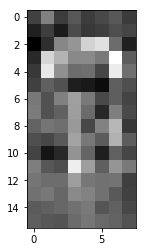

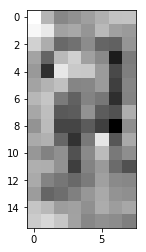

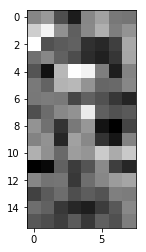

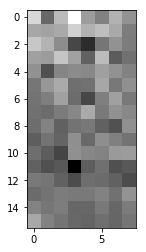

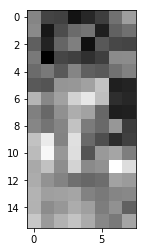

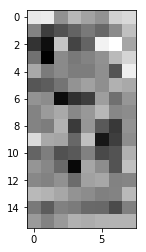

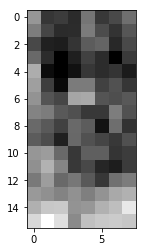

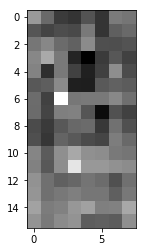

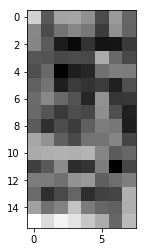

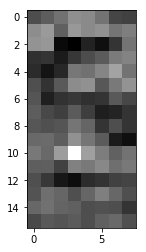

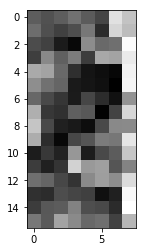

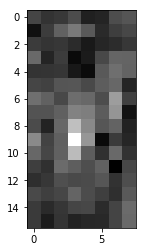

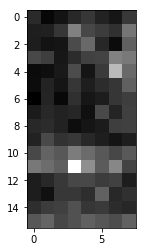

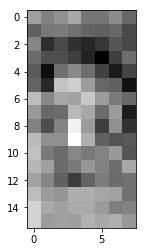

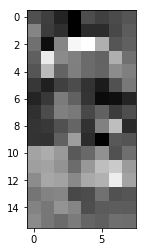

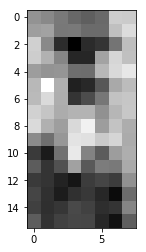

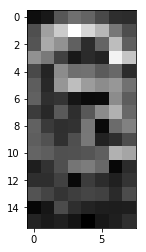

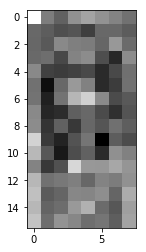

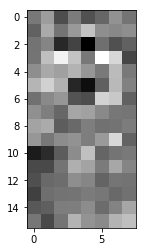

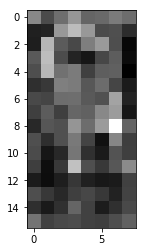

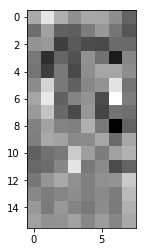

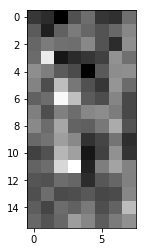

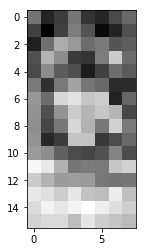

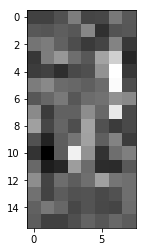

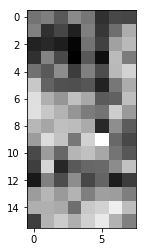

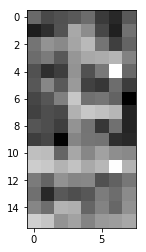

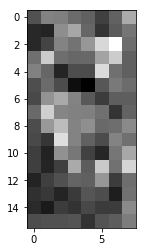

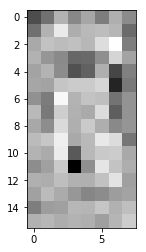

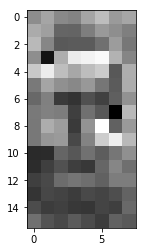

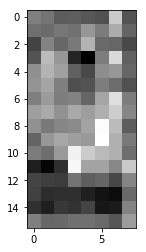

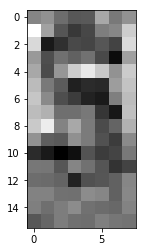

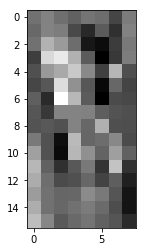

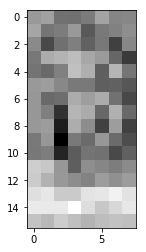

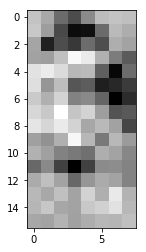

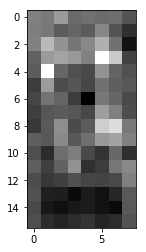

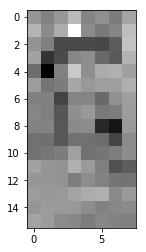

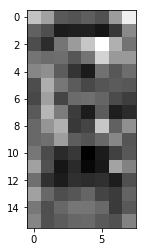

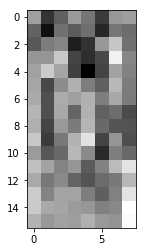

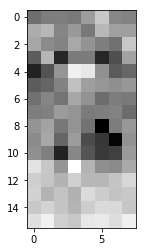

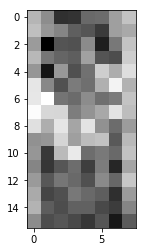

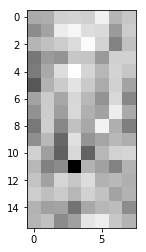

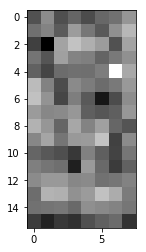

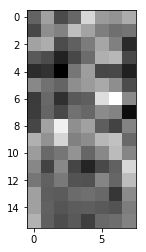

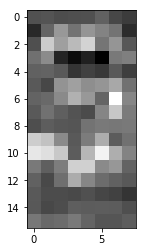

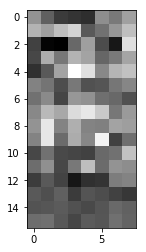

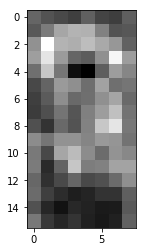

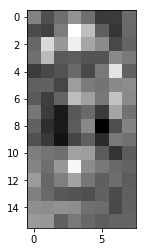

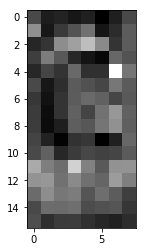

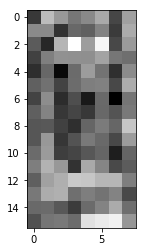

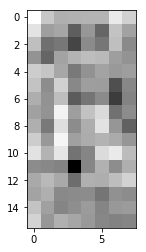

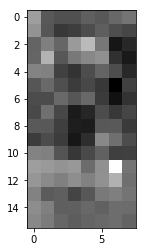

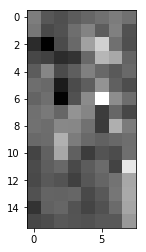

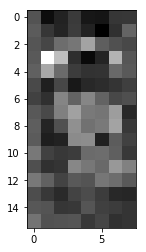

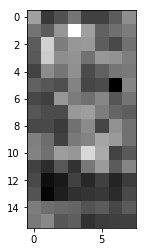

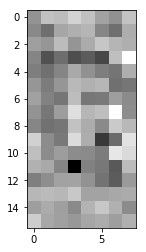

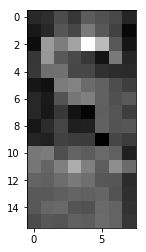

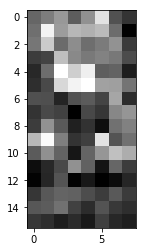

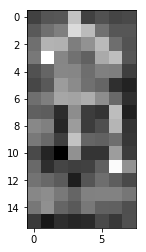

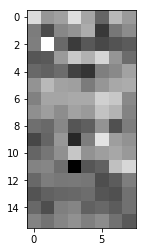

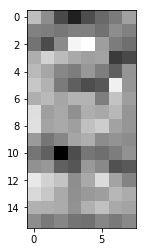

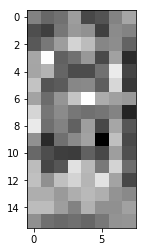

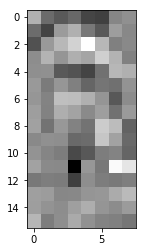

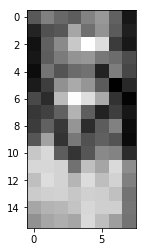

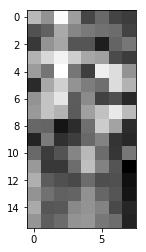

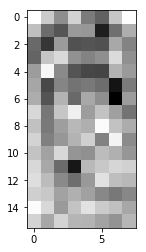

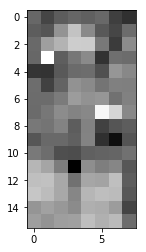

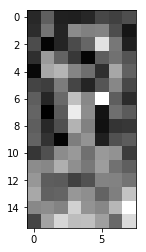

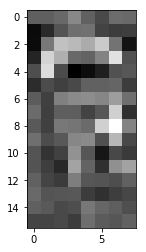

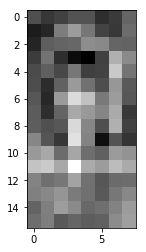

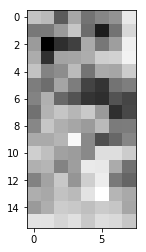

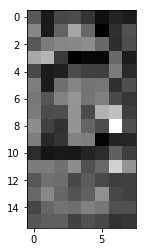

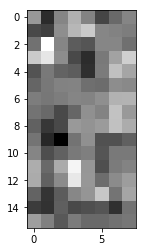

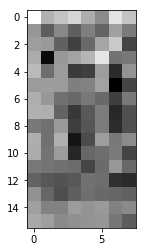

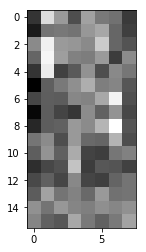

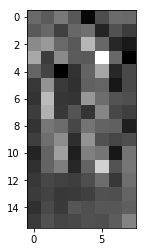

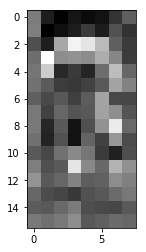

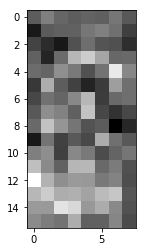

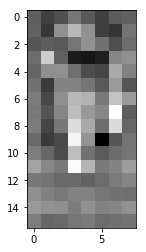

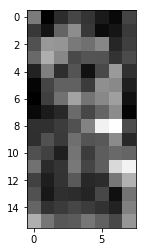

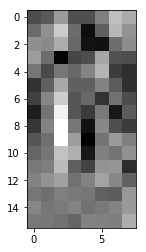

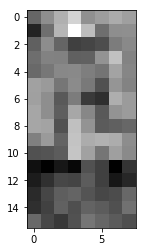

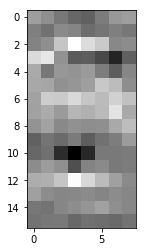

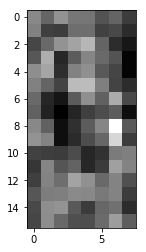

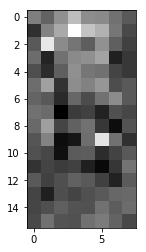

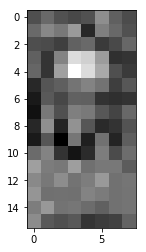

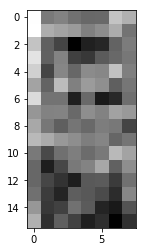

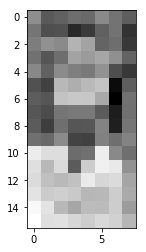

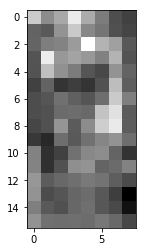

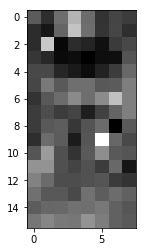

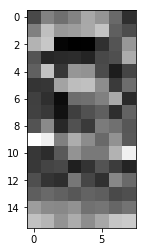

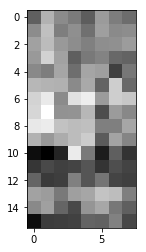

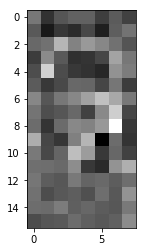

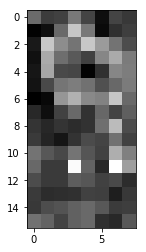

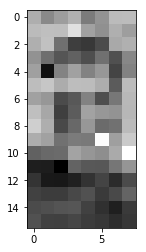

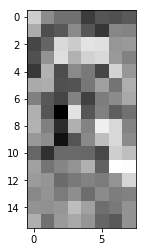

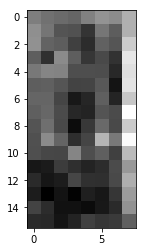

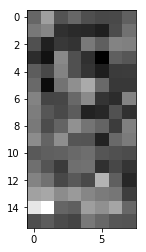

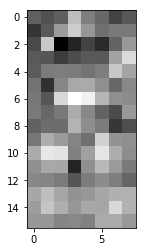

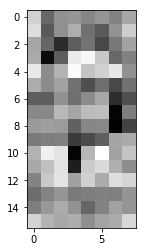

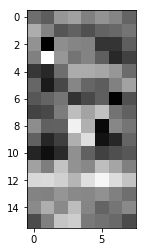

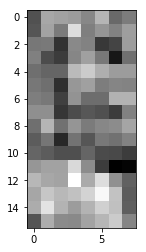

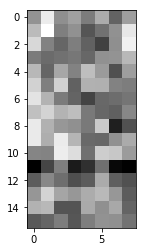

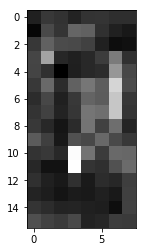

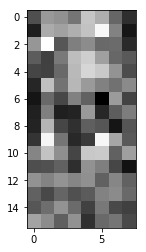

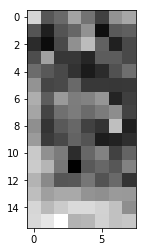

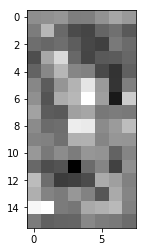

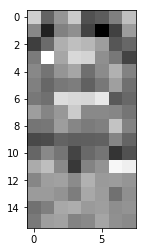

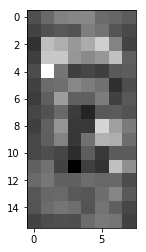

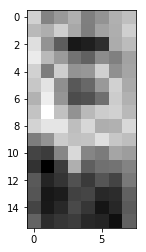

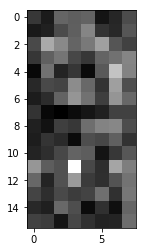

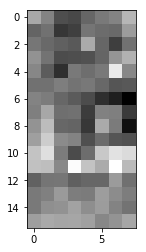

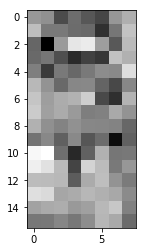

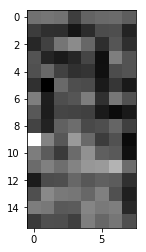

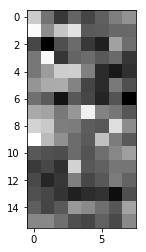

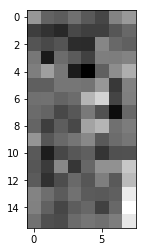

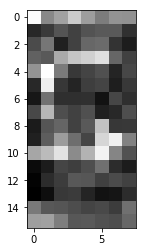

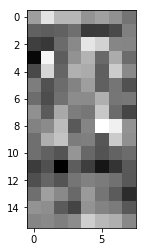

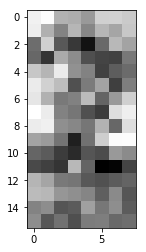

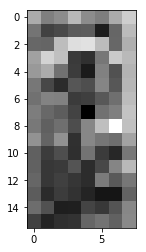

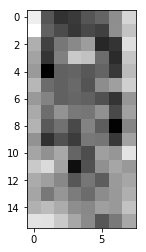

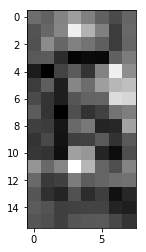

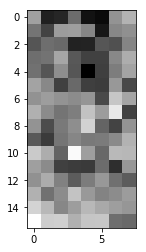

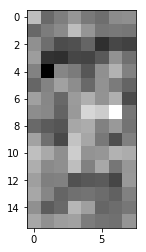

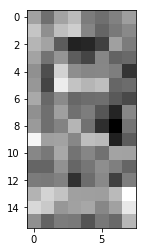

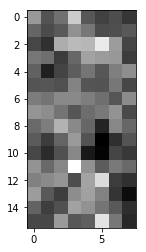

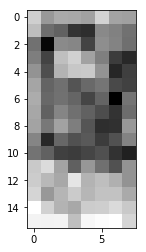

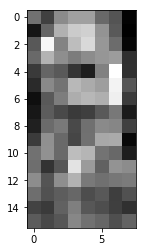

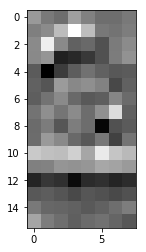

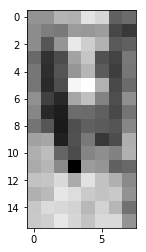

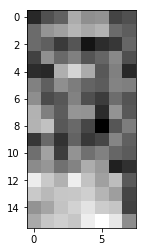

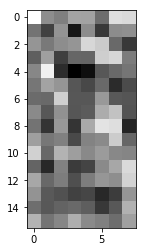

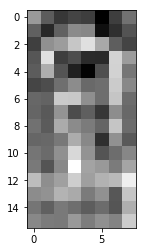

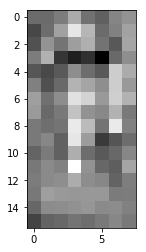

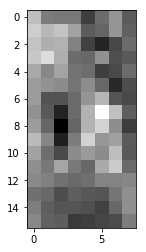

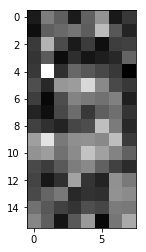

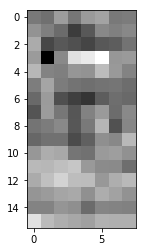

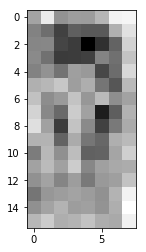

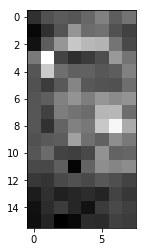

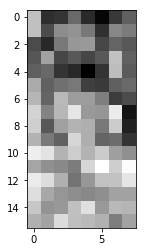

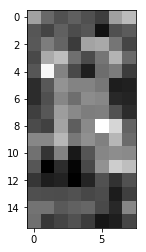

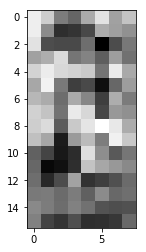

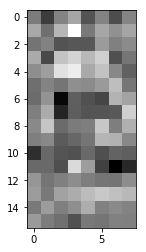

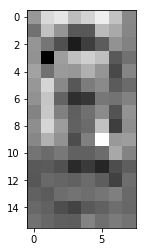

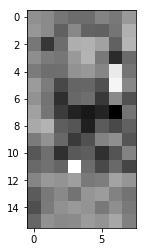

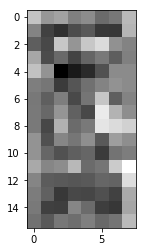

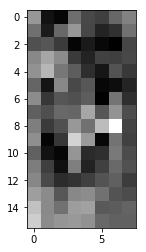

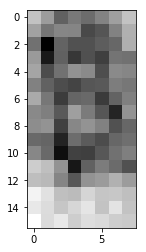

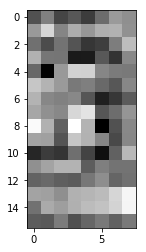

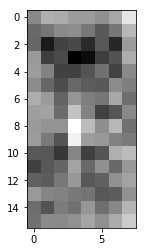

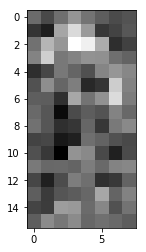

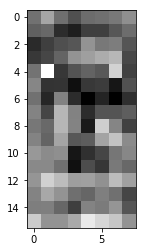

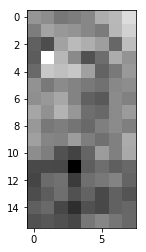

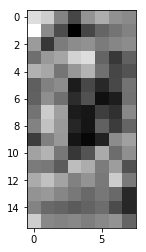

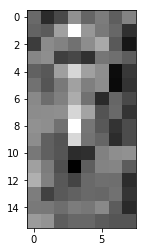

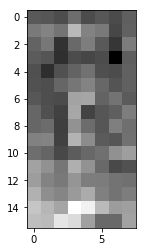

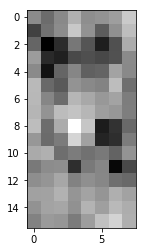

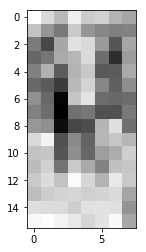

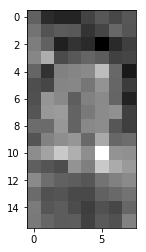

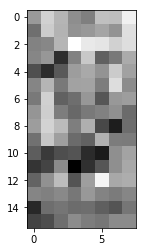

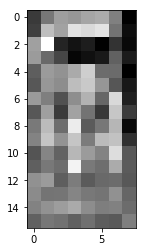

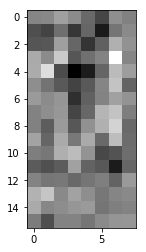

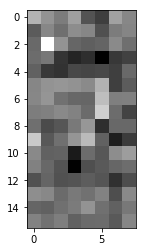

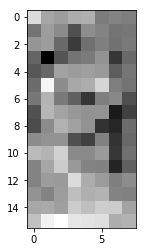

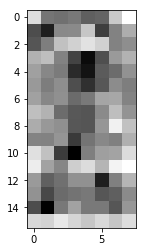

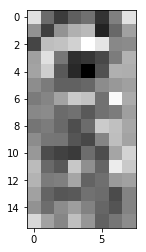

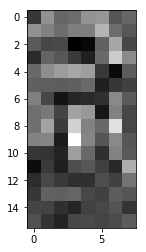

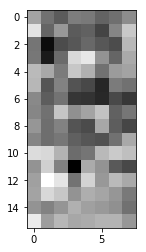

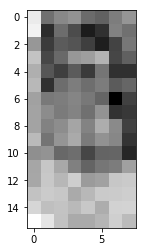

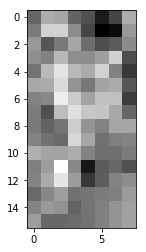

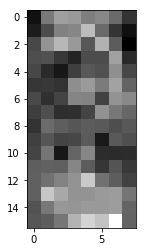

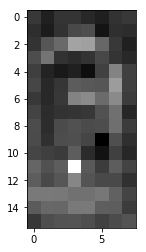

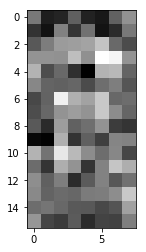

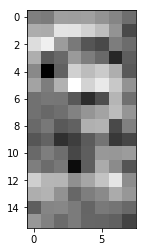

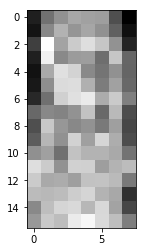

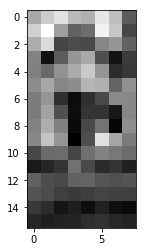

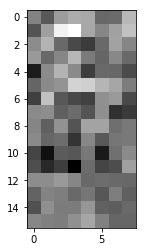

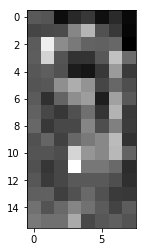

IndexError: index 256 is out of bounds for axis 2 with size 256

In [65]:
for i in range(1024):
    plt.imshow(np.squeeze(pred_overall)[..., i], cmap=plt.cm.gray)
    plt.show()